In [1]:
from skimage.feature import hog
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC

image = pd.read_csv('input.csv')


ModuleNotFoundError: No module named 'skimage'

In [2]:
def Convert(string): 
    li = list(string.split(" "))
    out=[]
    for item in li:
        out.append(int(item))
    return out

train_data = image['pixels'][image.Usage=='Training']
train_labels = image['emotion (label)'][image.Usage=='Training']
test_data = image['pixels'][image.Usage=='PrivateTest']
test_labels = image['emotion (label)'][image.Usage=='PrivateTest']
train_x=[]

print('Train data samples={0}, test data samples={1}'.format(len(train_data),len(test_data)))

for img in train_data:
    _ = Convert(img)
    train_x.append(np.asarray(_))
train_x

Train data samples=28709, test data samples=3589


[array([ 70,  80,  82, ..., 106, 109,  82]),
 array([151, 150, 147, ..., 193, 183, 184]),
 array([231, 212, 156, ...,  88, 110, 152]),
 array([ 24,  32,  36, ..., 142, 143, 142]),
 array([ 4,  0,  0, ..., 30, 29, 30]),
 array([55, 55, 55, ..., 34, 30, 57]),
 array([ 20,  17,  19, ...,  99, 107, 118]),
 array([ 77,  78,  79, ..., 125,  67,  68]),
 array([85, 84, 90, ..., 58, 73, 84]),
 array([255, 254, 255, ..., 254, 255, 255]),
 array([ 30,  24,  21, ..., 172, 173, 173]),
 array([39, 75, 78, ..., 84, 83, 87]),
 array([219, 213, 206, ...,   0,   0,   0]),
 array([148, 144, 130, ..., 112, 111, 111]),
 array([ 4,  2, 13, ...,  3,  7, 12]),
 array([107, 107, 109, ...,  83,  84, 106]),
 array([14, 14, 18, ...,  9, 10, 10]),
 array([255, 255, 255, ...,  79,  79,  83]),
 array([134, 124, 167, ...,  34,  28, 139]),
 array([219, 192, 179, ...,  57,  39,  40]),
 array([  1,   1,   1, ..., 213, 211, 215]),
 array([174,  51,  37, ...,   7,  11,  16]),
 array([123, 125, 124, ...,  97,  91,  89]),
 

In [3]:
print(train_x[0],len(train_x))

[ 70  80  82 ... 106 109  82] 28709


In [32]:
for i in range(len(train_data)):
    train_x[i] = train_x[i].reshape(48,48)
#     train_x[i] = list(train_x[i])

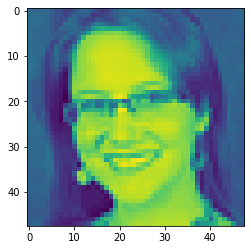

In [33]:
plt.imshow(train_x[7])

In [6]:
test_x=[]
for img in test_data:
    _ = Convert(img)
    test_x.append(np.asarray(_))
for i in range(len(test_data)):
    test_x[i] = test_x[i].reshape(48,48)
                  
test_x

[array([[170, 118, 101, ..., 112, 131, 124],
        [168, 125, 108, ..., 111, 124, 133],
        [173, 134, 113, ..., 103, 114, 128],
        ...,
        [ 82, 106,  99, ..., 164, 132, 127],
        [ 96, 105,  98, ..., 162, 130, 132],
        [104, 103,  99, ..., 159, 133, 131]]),
 array([[ 7,  5,  8, ..., 18, 10, 15],
        [ 7,  5,  8, ..., 29,  9, 19],
        [ 7,  5,  7, ..., 49, 12, 23],
        ...,
        [22, 16, 20, ..., 76, 61, 59],
        [21, 15, 24, ..., 73, 60, 55],
        [17, 16, 28, ..., 72, 57, 52]]),
 array([[232, 240, 241, ..., 235, 233, 235],
        [230, 238, 242, ..., 236, 232, 234],
        [228, 235, 241, ..., 236, 231, 232],
        ...,
        [240, 116,  96, ...,   2,   1,   2],
        [239, 153,  93, ...,   3,   2,   4],
        [232, 187, 121, ...,   4,   4,   9]]),
 array([[200, 197, 149, ..., 169, 129, 166],
        [159, 198, 154, ..., 159, 141, 126],
        [167, 175, 161, ..., 168, 162, 140],
        ...,
        [115, 132, 116, ...,   0,

In [7]:
ppc = 16
hog_images = []
hog_features = []
for image in train_x:
    fd,hog_image = hog(image,block_norm= 'L2',visualize=True, feature_vector=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

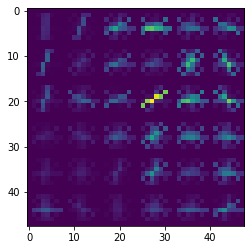

In [8]:
plt.imshow(hog_images[23])
# hog_features

In [9]:
train_labels = np.array(train_labels).reshape(len(train_labels),1)
test_labels =  np.array(test_labels).reshape(len(test_labels),1)
train_labels.shape, test_labels.shape

((28709, 1), (3589, 1))

In [10]:
hog_features = np.array(hog_features)
# data_frame = np.hstack((hog_features,train_labels))
# np.random.shuffle(data_frame)
# data_frame[0]

In [21]:
x_train = hog_features
y_train = train_labels.ravel()
clf = SVC(kernel='linear',probability=True ,verbose=True)
clf.fit(x_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [23]:
hog_images_test = []
hog_features_test = []
for image in test_x:
    fd,hog_image = hog(image,block_norm='L2',visualize=True, feature_vector=True)
    hog_images_test.append(hog_image)
    hog_features_test.append(fd)

In [25]:
y_pred = clf.predict(hog_features_test)

In [22]:
# clf.fit(hog_features_test, )

# for prob in np.arange(0.1, 0.9, 0.05):
#     print("f1-score when probability threshold = {:.4f} is: {.4f}".format(threshold, f1_score(y, list(map(lambda x:1 if x[1] > prob else 0, clf.predict_proba(hog_features_test))))))

In [28]:
from sklearn.metrics import f1_score

print("Accuracy: ",(accuracy_score(test_labels, y_pred)))
print('\n')
print("F1 score: \n",(f1_score(test_labels, y_pred)))

data =classification_report(test_labels, y_pred)

print(data)

Accuracy:  0.8311507383672332


F1 score: 
 0.5992063492063492
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2710
           1       0.72      0.52      0.60       879

    accuracy                           0.83      3589
   macro avg       0.79      0.72      0.75      3589
weighted avg       0.82      0.83      0.82      3589



In [29]:
# np.save('train_hog_AI0086.csv',hog_features)
# np.save('test_hog_AI0086.csv',hog_features_test)

In [30]:
pd.DataFrame(hog_features).to_csv("train_hog_AI0086.csv")
pd.DataFrame(hog_features_test).to_csv("test_hog_AI0086.csv")

In [18]:
# df = pd.DataFrame(y_pred,header=None)
# df

In [31]:
# y_pred